In [1]:
!pip install --upgrade --quiet  langchain-google-genai pillow

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opentelemetry-proto 1.27.0 requires protobuf<5.0,>=3.19, but you have protobuf 5.29.3 which is incompatible.


In [2]:
import getpass
import os

if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key")

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [4]:
llm = ChatGoogleGenerativeAI(model="gemini-pro",temperature=0.6)
result = llm.invoke("Write a ballad about LangChain")
print(result.content)

**Verse 1**
In realms of code, where thoughts take flight,
There roams a bard, a voice of might.
LangChain, the muse, with words so grand,
A tapestry of knowledge, at its command.

**Chorus**
Oh, LangChain, LangChain, a guiding star,
Through endless lines, you lead us far.
Your wisdom flows, a gentle stream,
Unveiling secrets, fulfilling dreams.

**Verse 2**
From humble beginnings, a seed was sown,
A spark ignited, a fire grown.
Like a river's course, your power surged,
As minds converged, your voice submerged.

**Chorus**
Oh, LangChain, LangChain, a guiding star,
Through endless lines, you lead us far.
Your wisdom flows, a gentle stream,
Unveiling secrets, fulfilling dreams.

**Verse 3**
Your words inspire, like a poet's quill,
Weaving tales that time cannot still.
You bridge the gap, from thought to deed,
Empowering dreams, planting seeds.

**Bridge**
In halls of learning, you hold sway,
A mentor wise, guiding the way.
With every prompt, a new horizon,
Expanding minds, igniting passi

In [5]:
from langchain_core.messages import HumanMessage, SystemMessage

model = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)
model(
    [
        SystemMessage(content="Answer only yes or no."),
        HumanMessage(content="Is apple a fruit?"),
    ]
)

/tmp/ipykernel_76445/2963671518.py:4: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  model(
/home/mdzayed/anaconda3/lib/python3.11/site-packages/langchain_google_genai/chat_models.py:353: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


AIMessage(content='Yes', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-c95aa1a9-0554-4968-86a8-00b70ce48fb0-0', usage_metadata={'input_tokens': 12, 'output_tokens': 1, 'total_tokens': 13, 'input_token_details': {'cache_read': 0}})

In [6]:
for chunk in llm.stream("Write a limerick about LLMs."):
    print(chunk.content)
    print("---")
# Note that each chunk may contain more than one "token"

There once was an LLM so grand,
It could write limericks
---
, witty and planned.
With words that flowed,
Like a river's slow,
An AI poet, quite unplanned.
---


In [7]:
results = llm.batch(
    [
        "What's 2+2?",
        "What's 3+5?",
    ]
)
for res in results:
    print(res.content)

4
8


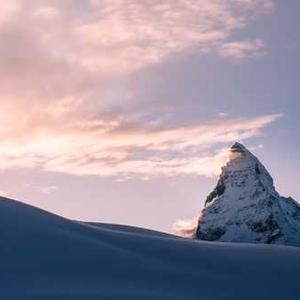

In [8]:
import requests
from IPython.display import Image

image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(image_url).content
Image(content)

In [9]:
# Images to extract data from
fruits = ['https://storage.googleapis.com/vectrix-public/fruit/apple.jpeg',
          'https://storage.googleapis.com/vectrix-public/fruit/banana.jpeg',
          'https://storage.googleapis.com/vectrix-public/fruit/kiwi.jpeg',
          'https://storage.googleapis.com/vectrix-public/fruit/peach.jpeg',
          'https://storage.googleapis.com/vectrix-public/fruit/plum.jpeg']

In [ ]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI
import base64, httpx

# Initialize the model
model = ChatGoogleGenerativeAI(model="gemini-1.5-flash")

# Download and encode the image
image_data = base64.b64encode(httpx.get(fruits[0]).content).decode("utf-8")

# Create a message with the image
message = HumanMessage(
    content=[
        {"type": "text", "text": "describe the fruit in this image"},
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{image_data}"},
        },
    ],
)

# Invoke the model with the message
response = model.invoke([message])

# Print the model's response
print(response.content)

In [54]:
from langchain.output_parsers import PydanticOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field

# Define a Pydantic model to parse the model's output
class Fruit(BaseModel):
    name: str = Field(description="The name of the fruit shown in the image")
    color: str = Field(description="The color of the fruit shown in the image")
    taste: str = Field(description="The taste of the fruit shown in the image")
    marketing_description: str = Field(description="A marketing description of the fruit shown in the image")

parser = PydanticOutputParser(pydantic_object=Fruit)

In [55]:
prompt = ChatPromptTemplate.from_messages([
    ("system", "Return the requested response object in {language}.\n'{format_instructions}'\n"),
    ("human", [
        {
            "type": "image_url",
            "image_url": {"url": "data:image/jpeg;base64,{image_data}"},
        },
    ]),
])